# BST의 각 노드를 현재값보다 더 큰 값을 가진 모든 노드의 합으로 만들어라. 

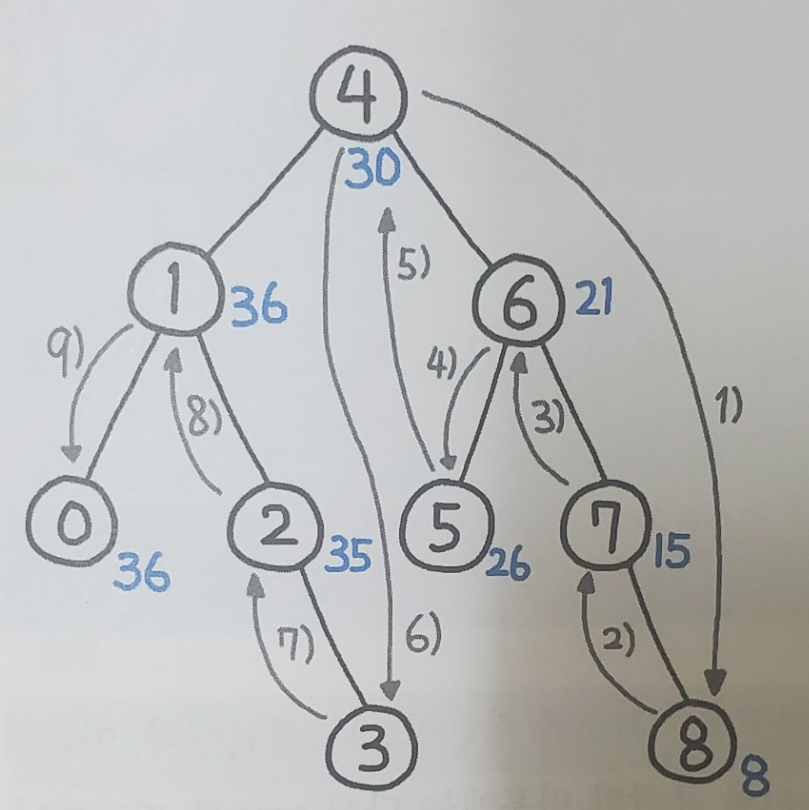

- 입력

```python
[4,1,6,0,2,5,7,null,null,null,3,null,null,null,8]
```

- 출력

```python
[30,26,21,36,35,26,15,null,null,null,33,null,null,null,8]
```

- 자신보다 더 큰 값을 가진 모든 노드의 합이 출력이 된다. 6의 경우 더 큰 값을 지닌 노드는 7,8 이며 이 값을 모두 합한 6+7+8 = 21 이 출력노드가 된다.

# 준비

In [ ]:
data = [4,1,6,0,2,5,7,None,None,None,3,None,None,None,8]

class TreeNode:
    def __init__(self, val = 0, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right

def BuildTree(nodes, index):
    node = None
    # 현재 인덱스가 데이터 리스트의 범위를 벗어나지 않고, 노드가 None이 아닌 경우에만 노드를 생성합니다.
    if index < len(nodes) and nodes[index] is not None:
        # 현재 인덱스에 해당하는 값으로 새로운 노드를 생성합니다.
        node = TreeNode(nodes[index])
        # 왼쪽 자식 노드를 생성하기 위해 재귀적으로 build_tree 함수를 호출합니다.
        # 왼쪽 자식 노드의 인덱스는 현재 인덱스의 2배 + 1 입니다. 오른쪽은 2 *i + 2 입니다.
        node.left = BuildTree(nodes, 2*index + 1)
        node.right = BuildTree(nodes, 2 * index + 2)
    return node

## 중위순회로 노드값 누적

- 자신보다 같거나 큰 값을 구하려면 자기 자신을 포함한 우측 자식 노드의 합을 구하면 된다.

- 앞서 설명했듯이 BST의 우측 자식 노드는 항상 부모노드보다 큰 값이기 때문이다.   

In [ ]:
class Solution:
    val: int = 0

    def bstToGst(self, root):
        # 중위 순회 노드 값 누적
        if root:
            self.bstToGst(root.right)
            self.val += root.val
            root.val = self.val
            self.bstToGst(root.left)
        return root 

1. 노드가 비어있지 않다면
2. 우측 노드를 향해 재귀호출함
3. 자신을 더함 (<- 이거 왜 하지? 자신보다 더 큰 값만 구해야 하는데?)
4. self 변수에 자신을 더한만큼 저장한 다음 다시 변수를 전달